In [16]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [70]:
data = pd.read_csv('ADANIPORTS.csv')

# data
df = data[[ "Prev Close", "Open", "High", "Low", "Close","Volume"]]
# df = df.dropna()
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,2019-12-24,ADANIPORTS,EQ,366.90,368.00,372.00,366.00,368.50,368.60,368.88,2948878,1.087779e+14,45244.0,1063340,0.3606
2989,2019-12-26,ADANIPORTS,EQ,368.60,368.80,370.60,362.10,362.10,363.65,366.52,2503435,9.175530e+13,33520.0,774317,0.3093
2990,2019-12-27,ADANIPORTS,EQ,363.65,366.75,367.90,362.80,363.85,363.70,365.19,2146972,7.840569e+13,30299.0,445974,0.2077
2991,2019-12-30,ADANIPORTS,EQ,363.70,371.00,371.00,363.75,366.00,365.95,366.81,4732203,1.735840e+14,45583.0,529147,0.1118


<Axes: >

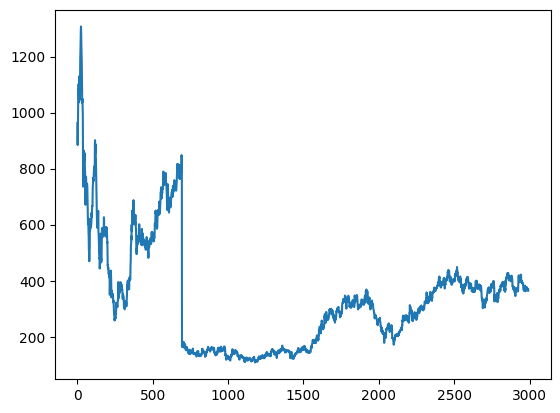

In [51]:
df['Close'].plot()

In [64]:
train_data = df.iloc[:int(.30*len(df)),:]
test_data =  df.iloc[int(.70*len(df)):,:]
# x = df.drop('Close',axis=1)
# y = df['Close']
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.6)

In [66]:
features = ['Open','Volume']
target = 'Close'


In [65]:
model = xgb.XGBRegressor()
model.fit(train_data[features],train_data[target])




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred = model.predict(test_data[features])
accuracy = model.score(test_data[features],test_data[target])
accuracy


0.6688350559324576